<a href="https://colab.research.google.com/github/wqiu96/summer_project/blob/master/src/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!git clone https://github.com/wqiu96/summer_project.git

Cloning into 'summer_project'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 678 (delta 13), reused 0 (delta 0), pack-reused 637
Receiving objects: 100% (678/678), 2.55 MiB | 2.72 MiB/s, done.
Resolving deltas: 100% (340/340), done.


In [18]:
cd summer_project/src/

/content/foo1/src/summer_project/src


In [19]:
pip install ipdb

In [0]:
from hjb_mdp_01 import *

In [0]:
def solver(mdp, n_epoch = 500):
    ######### nn for value
    # Linear regression model
    value = nn.Sequential(
        nn.Linear(mdp.n_dim_, 2*mdp.n_dim_+10),
        nn.sin(),
        nn.Linear(2*mdp.n_dim_+10, 1),
    )   
    print(value)
    
    #loss
    def tot_loss():
        out = 0.
        for ix in deep_iter(*mdp.v_shape_):
            out += mdp.bellman(ix,value)**2
        return out#/mdp.v_size_
    
    print_n = 10
    epoch_per_print= int(n_epoch/print_n)
    
    start_time = time.time()
    for epoch in range(n_epoch):
        #ipdb.set_trace()
        loss = tot_loss() #forward pass
        #backward propogation
        # optimizer
        lr = max(1/(epoch+10.), .001)
        optimizer = torch.optim.SGD(value.parameters(), lr, momentum = .8) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % epoch_per_print == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(
                  epoch+1, n_epoch, loss.item()))
        if loss.item()<0.0002:
            break
    end_time = time.time()
    print('>>>time elapsed is: ' + str(end_time - start_time))
    return value

>>>>Elliptic Linear PDE with 1-dim
>>>>MDP with 1-dim 8 mesh num
Sequential(
  (0): Linear(in_features=1, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)
Epoch [50000/500000], Loss: 0.0014
Epoch [100000/500000], Loss: 0.0013
Epoch [150000/500000], Loss: 0.0013
Epoch [200000/500000], Loss: 0.0012
Epoch [250000/500000], Loss: 0.0012
Epoch [300000/500000], Loss: 0.0011
Epoch [350000/500000], Loss: 0.0011
Epoch [400000/500000], Loss: 0.0011
Epoch [450000/500000], Loss: 0.0011
Epoch [500000/500000], Loss: 0.0010
>>>time elapsed is: 2399.320469856262
>>>L2-error-norm: 0.01465772646607085
[0.25012916326522827, 0.23226134479045868, 0.21439355611801147, 0.19652576744556427, 0.17865797877311707, 0.16079017519950867, 0.16824939846992493, 0.2002153992652893, 0.2499033510684967]


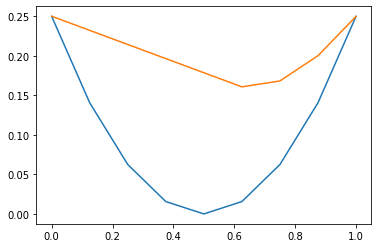

In [5]:
torch.manual_seed(0)
p = Pde(n_dim_=1); m = Mdp(p, n_mesh_= 8, method='cfd')
value = solver(m, n_epoch=500000)
######check solution
err =0
for ix1 in deep_iter(*m.v_shape_):
    s1 = m.i2s(ix1)
    v1 = value(torch.FloatTensor(s1)).item()
    exact_v1 =p.exact_soln(s1) 
    err1 = v1-exact_v1
    err += err1**2

err = err/m.v_size_
print('>>>L2-error-norm: '+str(err))


if p.n_dim_==1:
    cod_x = []; cod_y=[]; cod_y_pred = []
    for ix1 in deep_iter(*m.v_shape_):
        s1 = m.i2s(ix1); cod_x += [s1,]
        v1 = value(torch.FloatTensor(s1)).item(); cod_y_pred += [v1,]
        exact_v1 =p.exact_soln(s1); cod_y += [exact_v1,]

    plt.plot(cod_x, cod_y, cod_x, cod_y_pred)

print(cod_y_pred)